In [9]:
res_dir = 'results/2GRU-128-L8-L6-bs32'
seeds = [23, 89, 196, 27863]
import json
from os.path import exists

for i in seeds:
  ff = f"{res_dir}/seed{i}/overview.json"
  if not exists(ff):
    overview = {}
  else:
    with open(ff,'r') as f:
      overview = json.load(f)
    

  print(f"{overview.get('train_accuracy','')}")
  print(f"{overview.get('val_accuracy','')}")
  print(f"{overview.get('test_accuracy','')}")
  print()





0.9824762940406799
0.18726474046707153
0.2867377996444702











In [50]:
all_keys = [
  ['accuracy', 'val_accuracy'],
  ['total_g_loss', 'c_loss', 'g_loss', 'imp_loss', 'reg_loss'],
  ['d_loss']
]

import matplotlib.pyplot as plt

def plot_all(metrics):
    n = len(all_keys)
    plt.rcParams["figure.figsize"] = (n*4,3)
    plt.subplots(1,n)
    for i, keys in enumerate(all_keys):
      plt.subplot(1,n, i+1)
      for key in keys:
        data = metrics.get(key, [])
        plt.plot(range(len(data)),data, label=key)
      plt.legend()
    return plt.show()
      
   

In [19]:
import csv
def get_metrics(res_dir):
  with open(f"{res_dir}/trainlog.csv") as f:
    reader = csv.reader(f)
    keys =next(reader)
    metrics = {k:[] for k in keys}
    
    for row in reader:
      for k,v in zip(keys, row):
        metrics[k].append(float(v))
  return metrics


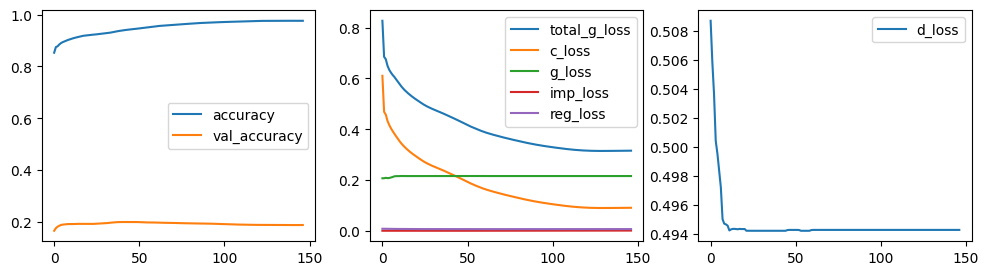

In [51]:
plot_all(get_metrics('results/week47/GRU128-LR6-BS64/seed89'))

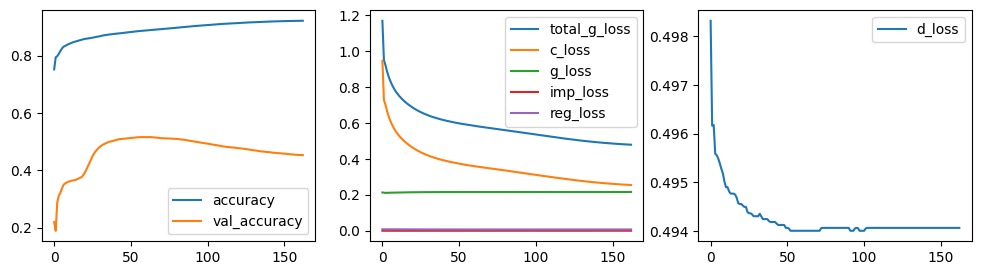

In [52]:
plot_all(get_metrics('results/week47/GRU128-LR6-BS128/seed89'))

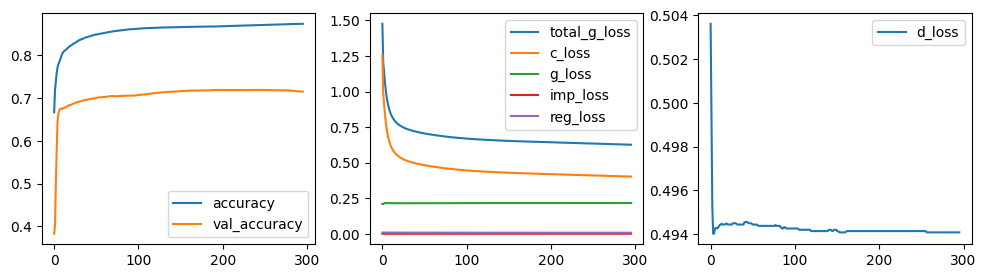

In [53]:
plot_all(get_metrics('results/week47/GRU128-LR6-BS256/seed89'))